# Analisis Exploratorio de Datos (EDA).

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df=pd.read_csv("C:/Users/saran/OneDrive/Documentos/Analitica de datos/diabetes_proyecto.csv")

* Tamaño del dataset

In [4]:
print(df.shape)

(500768, 14)


In [5]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0             72             35      0.0  33.6   
1            1     85.0             66             29      0.0  26.6   
2            8    183.0             64              0      0.0  23.3   
3            1     89.0             66             23     94.0  28.1   
4            0    137.0             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Lifestyle  DietType SmokingStatus  \
0                     0.627   50        1     Active  Balanced    Non-Smoker   
1                     0.351   31        0     Active  Balanced        Smoker   
2                     0.672   32        1  Sedentary  Balanced    Non-Smoker   
3                     0.167   21        0  Sedentary  Balanced    Non-Smoker   
4                     2.288   33        1     Active   LowCarb    Non-Smoker   

  FamilyHistory  StressLevel  
0           Yes         8.29  
1            No         

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500768 entries, 0 to 500767
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Pregnancies               500768 non-null  int64  
 1   Glucose                   485768 non-null  float64
 2   BloodPressure             500768 non-null  int64  
 3   SkinThickness             500768 non-null  int64  
 4   Insulin                   495768 non-null  float64
 5   BMI                       500768 non-null  float64
 6   DiabetesPedigreeFunction  500768 non-null  float64
 7   Age                       500768 non-null  int64  
 8   Outcome                   500768 non-null  int64  
 9   Lifestyle                 500768 non-null  object 
 10  DietType                  500768 non-null  object 
 11  SmokingStatus             500768 non-null  object 
 12  FamilyHistory             500768 non-null  object 
 13  StressLevel               475768 non-null  f

* Variables numericas: Pregnancies, Glucose, BloodPressure, SkinThickness, BMI, DiabetesPedigreeFunction,  Insulin, Age, Outcome y StressLevel.
* Variables categoricas: LifeStyle, DietType, SmokinStatus y FamilyHistory.
* Variable objetivo: Outcome -  0:Paciente NO tiene diabetes 1: Paciente SI tiene diabetes.

In [7]:
print(df.describe())

         Pregnancies        Glucose  BloodPressure  SkinThickness  \
count  500768.000000  485768.000000  500768.000000  500768.000000   
mean        3.841408     120.921442      69.105704      20.554934   
std         3.364811      31.967228      19.324696      15.937876   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000      99.000000      62.000000       0.000000   
50%         3.000000     117.000000      72.000000      23.000000   
75%         6.000000     141.000000      80.000000      32.000000   
max        17.000000     199.000000     122.000000      99.000000   

             Insulin            BMI  DiabetesPedigreeFunction            Age  \
count  495768.000000  500768.000000             500768.000000  500768.000000   
mean       79.975664      32.000368                  0.472195      33.252502   
std       115.420162       7.885470                  0.330989      11.759591   
min         0.000000       0.000000                  0.078

* La mayoria de mujeres ha tenido entre 1 y 6 embarazos, con casos extremos de hasta 17.
* Respecto a la glucosa en sangre obtenemos una media de 120 y un rango intercuartilico entre 99 y 141 con un maximo de 199 lo cual parece muy razonable.
* Para la presion arterial tenemos un promedio de 69 lo cual medicamente esta dentro de lol normal.
* Para espesor de piel obtenemos un promedio bajo de 20 lo cual representa grasa corporal.
* En la variable insulina encontramos que es muy variable porque da un promedio de 80 pero con casos extremos de hasta 846.
* Indice de masa corporal tiene un promedio de 32 lo que indicaria un alto riesgo metabolico asociado al peso porque corresponde a obesidad de grado I.
* Antecedentes geneticos de diabetes nos indica un riesgo en promedio bajo de 0.47.
* El promedio de la edad de las personas incluidas en la muestra.
* con el Diagnostico de diabetes observamos que solo el 20% de las mujeres tienen diabetes diagnosticada.
* Obtenemos un nivel de estres promedio de 5 pero algunos datos son negativos lo que no tiene sentido.
* Tenemos unas variables que tienen ceros como datos y esto no tiene sentido si lo aterrizamos a la realidad como: Glucose, BloodPressure, SkinThckness, Insulin Y BMI. Hay que tener en cuenta que al ser ceros sin sentido probablemente fueron datos que no se tomaron y seria mejor manejarlos como datos faltantes. 

In [8]:
print(df.isnull().sum())

Pregnancies                     0
Glucose                     15000
BloodPressure                   0
SkinThickness                   0
Insulin                      5000
BMI                             0
DiabetesPedigreeFunction        0
Age                             0
Outcome                         0
Lifestyle                       0
DietType                        0
SmokingStatus                   0
FamilyHistory                   0
StressLevel                 25000
dtype: int64


* Observamos que tenemos datos faltantes en las variables Glucose, Insuline y Stresslevel.

In [9]:
missing_pct = df.isnull().mean()*100
print(missing_pct)

Pregnancies                 0.000000
Glucose                     2.995399
BloodPressure               0.000000
SkinThickness               0.000000
Insulin                     0.998466
BMI                         0.000000
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
Lifestyle                   0.000000
DietType                    0.000000
SmokingStatus               0.000000
FamilyHistory               0.000000
StressLevel                 4.992332
dtype: float64


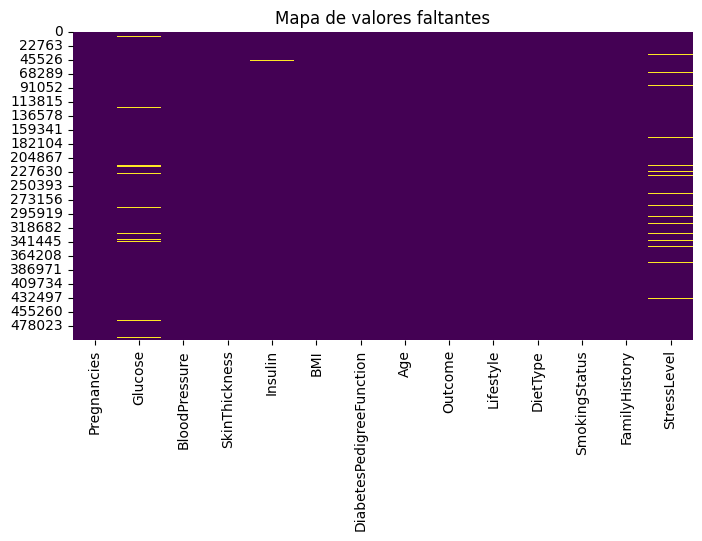

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de valores faltantes")
plt.show()p

* Al tener en ciertas variables con entre 1% y 5% de datos faltantes en un caso de una base de datos con datos clinicos, la mejor opcion NO es eliminar las filas con datos faltantes porque podemos perder informacion importante.
* De esta manera mas adelante se explicara de que manera se decidio manejar esos datos faltantes.

### Balance de clases

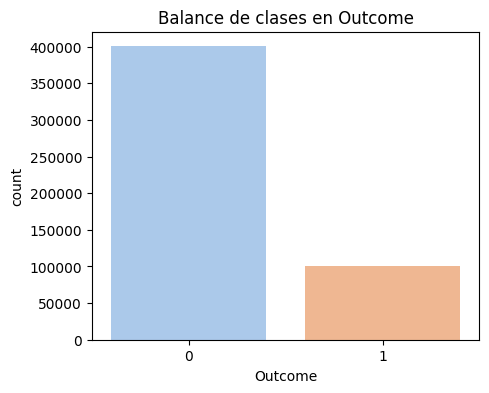

Outcome
0    79.978353
1    20.021647
Name: proportion, dtype: float64


In [11]:
plt.figure(figsize=(5,4))
sns.countplot(x="Outcome", hue="Outcome", data=df, palette="pastel", legend=False)
plt.title("Balance de clases en Outcome")
plt.show()

print(df["Outcome"].value_counts(normalize=True)*100)



* El 79.9% de los registros corresponden a pacientes no diabeticos.
* 20% de loss registros corresponden a pacientes diabeticos.
* Esto indica un fuerte desbalance de clases.
* Por lo tanto sabemos que el dataset tiene 4 veces mas pacientes sanos que con diabetes, este desbalance muestra como en la poblacion general suele ser menor las personas con diabetes que con diabetes.
* Es necesario corregir esto porque sino se hace los modelos predictivos van a tender a "favorecer" la clase mayoritaria que en este caso son los no biabeticos.

### Distribucion de variables numericas

In [12]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta donde quieres guardar las imágenes
save_path = "/mnt/data/figs/"

# Crear la carpeta si no existe
os.makedirs(save_path, exist_ok=True)

# Recorremos todas las variables numéricas
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(12, 5))
    
    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribución de {col}")
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    
    # Guardar la figura en la carpeta figs
    plt.savefig(os.path.join(save_path, f"{col}_hist_box.png"), dpi=200, bbox_inches='tight')
    plt.close()


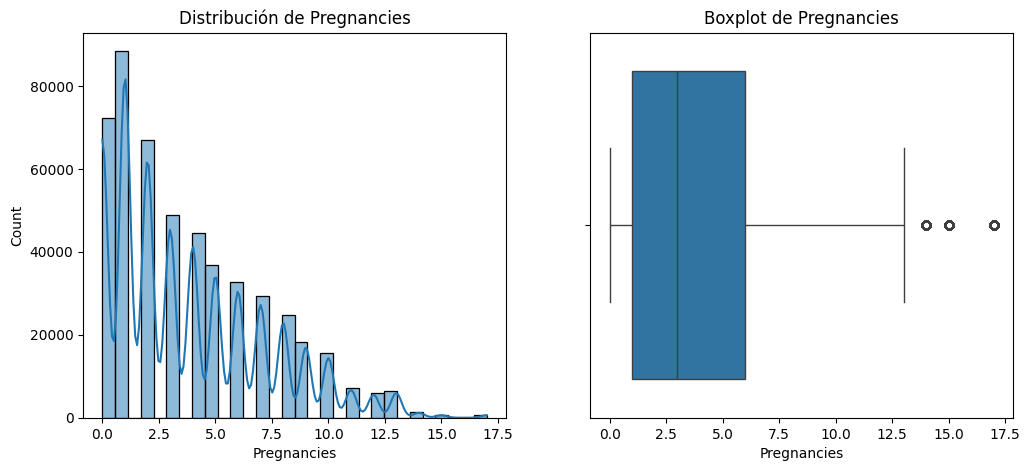

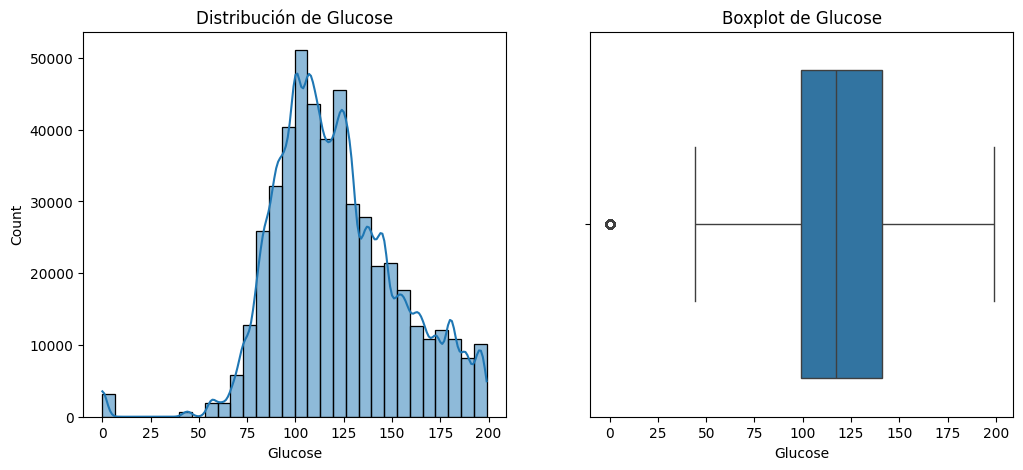

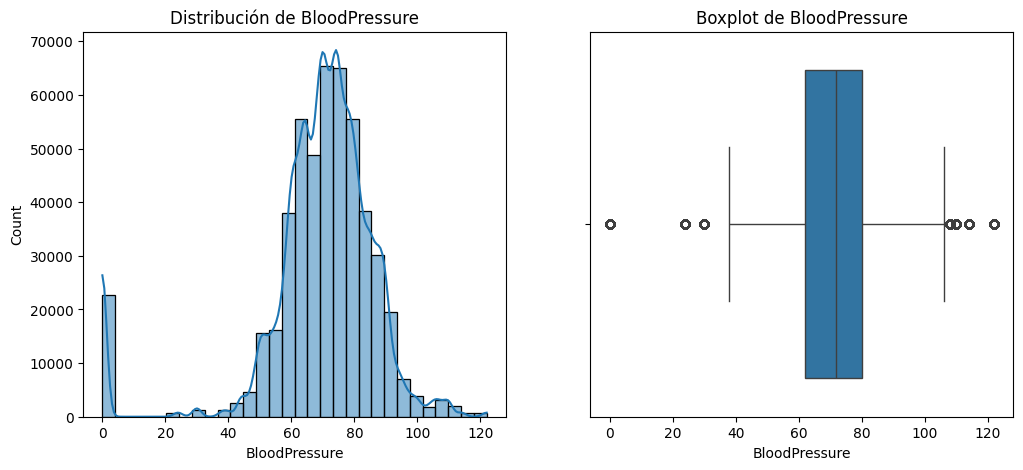

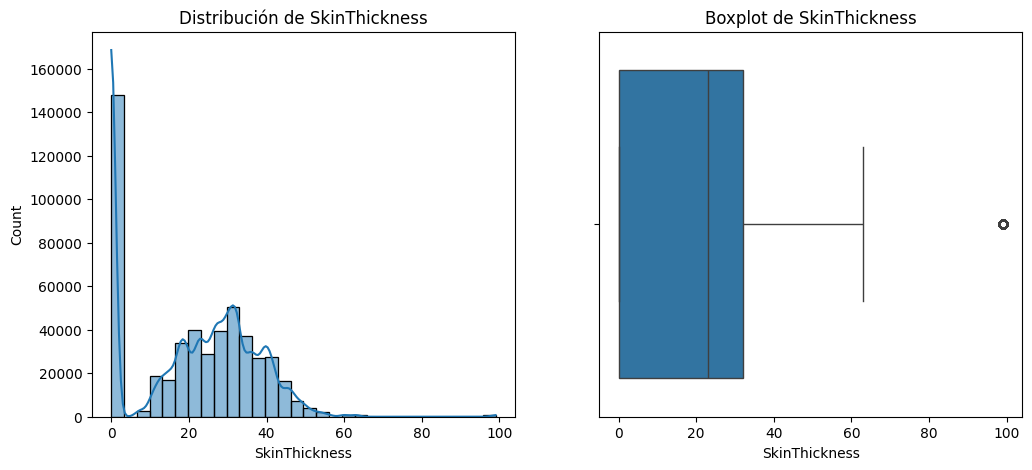

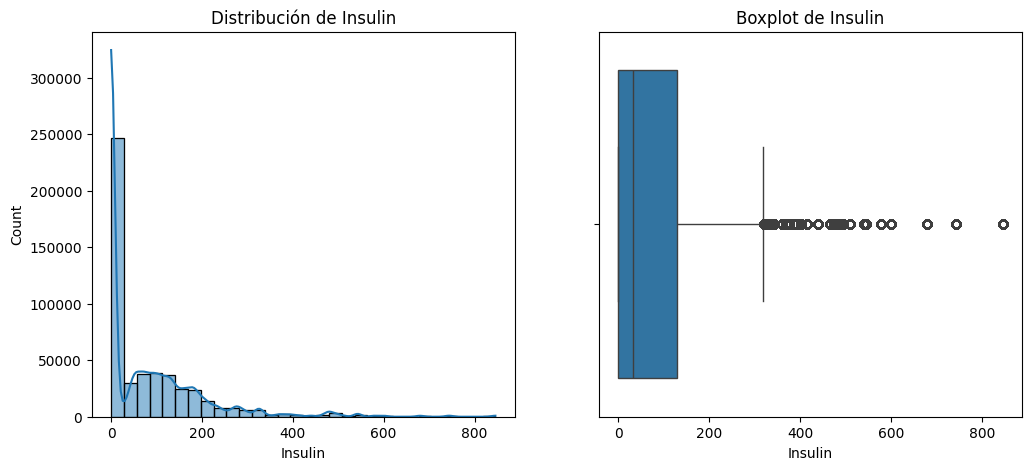

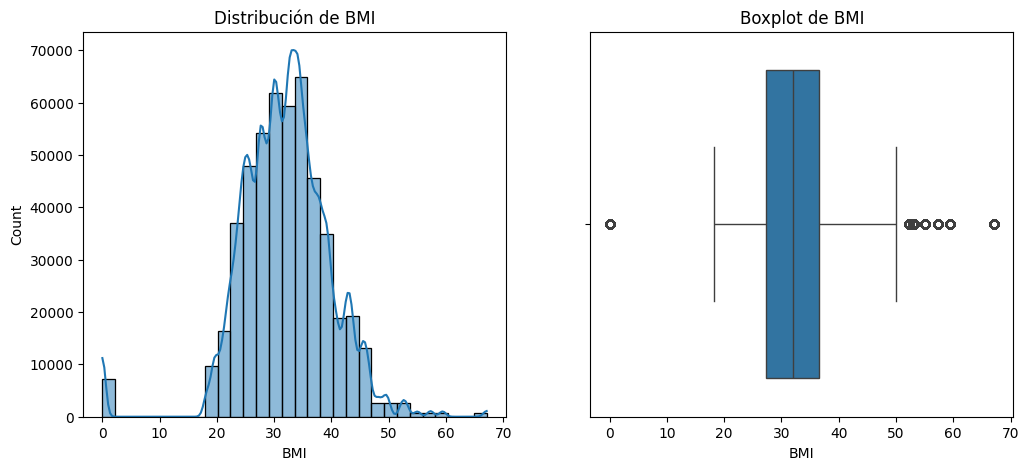

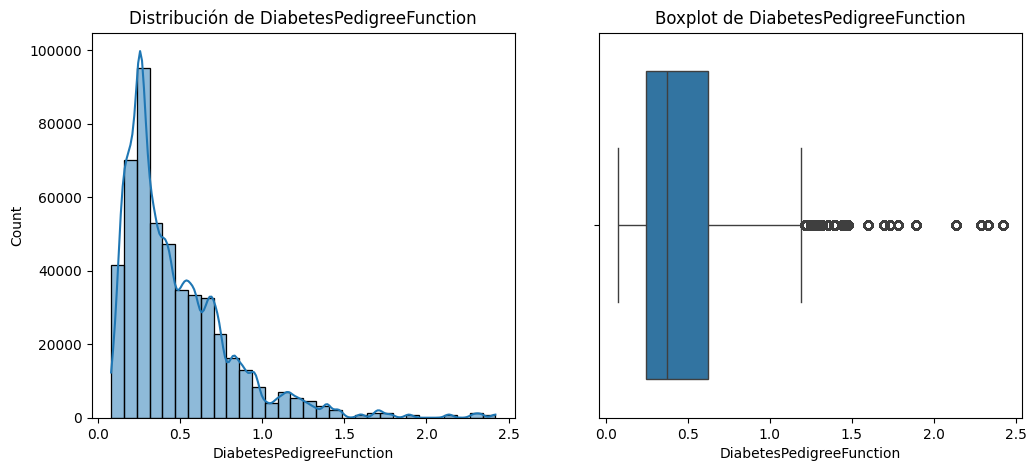

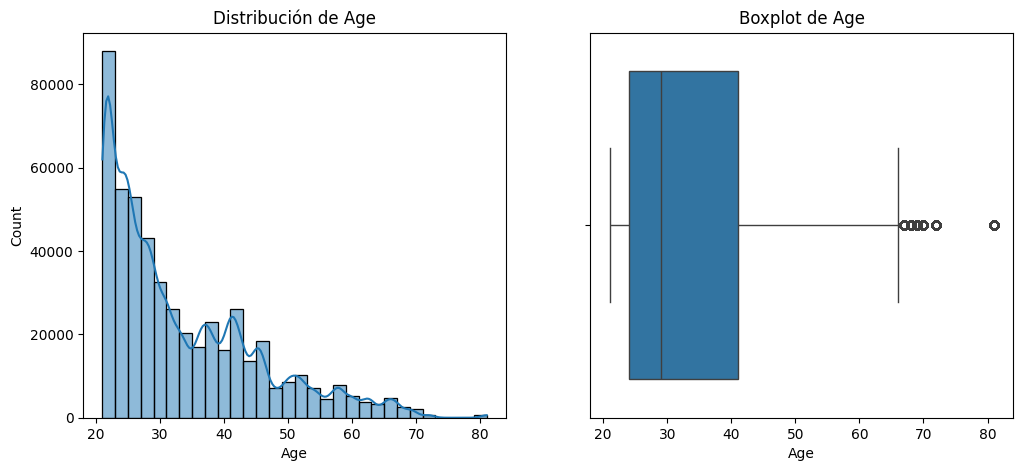

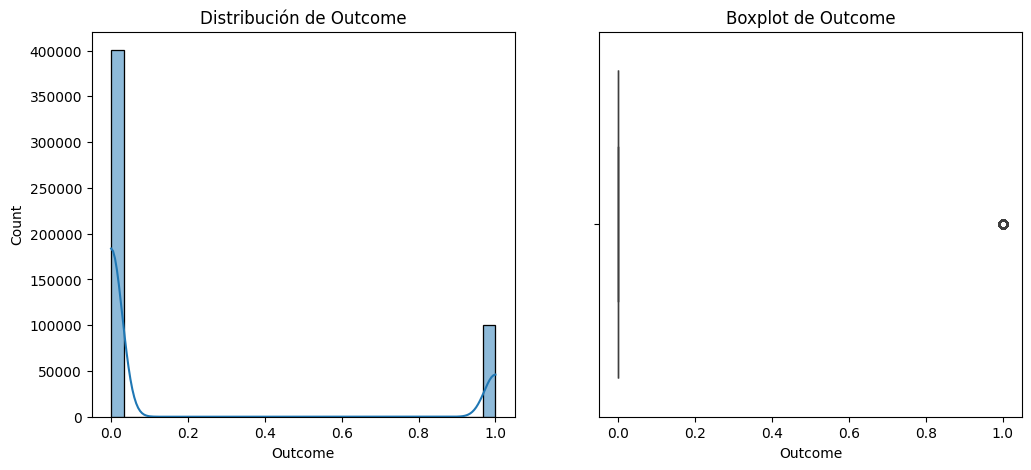

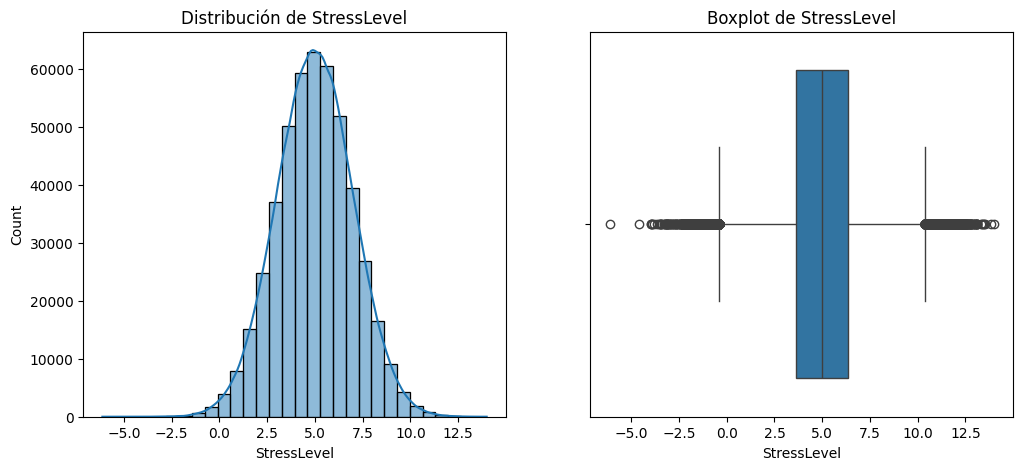

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(12, 5))
    
    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribución de {col}")
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    
    plt.show()


Pregnancies:

* Qué muestra: Distribución y boxplot de embarazos.
* Hallazgo: La mayoría entre 0–5; algunos outliers >12.
* Interpretación: Distribución sesgada a la derecha.
* Implicación: Puede requerir tratamiento de outliers.
* Limitación: Variable discreta y no normal.

Glucose:

* Qué muestra: Niveles de glucosa.
* Hallazgo: Centro en 100–125; outliers cerca de 0 y >180.
* Interpretación: Valores bajos pueden ser errores; altos reflejan hiperglucemia.
* Implicación: Variable clave para el diagnóstico.
* Limitación: Revisar valores extremos.

BloodPressure

* Qué muestra: Presión arterial.
* Hallazgo: Mayoría 60–85; outliers en 0 y >120.
* Interpretación: Ceros poco realistas → datos faltantes.
* Implicación: Requiere limpieza o imputación.
* Limitación: Influida por factores externos no controlado

SkinThickness

* Qué muestra: Pliegue cutáneo.
* Hallazgo: Muchos valores en 0; moda alrededor de 30.
* Interpretación: Ceros son datos faltantes más que reales.
* Implicación: Requiere imputación antes del modelado.
* Limitación: Medición sensible al observador.

Insulin

* Qué muestra: Niveles de insulina.
* Hallazgo: Distribución sesgada, gran cantidad de ceros y outliers >600.
* Interpretación: Ceros posiblemente datos faltantes; dispersión alta refleja variabilidad metabólica.
* Implicación: Necesario limpiar o transformar la variable.
* Limitación: Alta varianza interindividual.

DiabetesPedigreeFunction

* Qué muestra: Riesgo hereditario de diabetes.
* Hallazgo: Distribución sesgada, mayoría <1, algunos outliers >2.
* Interpretación: Captura historial familiar, pero con gran asimetría.
* Implicación: Útil para modelar riesgo genético.
* Limitación: Basado en autorreporte → posible sesgo.

Age

* Qué muestra: Edad de los pacientes.
* Hallazgo: Sesgo hacia adultos jóvenes (20–40 años); algunos outliers >70.
* Interpretación: Mayoría de la muestra es población joven; casos mayores son menos frecuentes pero relevantes.
* Implicación: La edad puede ser predictor de riesgo creciente de diabetes.
* Limitación: No captura estilo de vida asociado a cada rango etario.

Outcome

* Qué muestra: Variable objetivo (0 = no diabetes, 1 = diabetes).
* Hallazgo: Distribución desbalanceada, más clase 0 que clase 1.
* Interpretación: La mayoría de los pacientes no son diabéticos.
* Implicación: El modelo requerirá técnicas de balanceo (SMOTE, pesos).
* Limitación: Desequilibrio puede afectar la sensibilidad del modelo.

StressLevel

* Qué muestra: Nivel de estrés.
*  Hallazgo: Distribución casi normal centrada en 6–7; algunos outliers extremos.
* Interpretación: Estrés podría relacionarse con estilo de vida y predisposición a diabetes.
* Implicación: Potencial variable explicativa si interactúa con BMI o Glucosa.
* Limitación: Basado en autorreporte → subjetivo y variable según contexto.

### Outliers

In [19]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


Pregnancies: 2585 outliers
Glucose: 3115 outliers
BloodPressure: 29338 outliers
SkinThickness: 648 outliers
Insulin: 22022 outliers
BMI: 12382 outliers
DiabetesPedigreeFunction: 18936 outliers
Age: 5882 outliers
Outcome: 100262 outliers
StressLevel: 3371 outliers


* Como se puede observar las variables con mas outliers relevantes son BloodPressure, Insulim, BMI y DiabetesPedigreeFunction, por lo tanto necesitan un tratamiento especifico.
* Mientras que los outliers que se presentan en las variables Pregnancies o SkinThickness los outliers no son muy criticos.
* Alguno outliers presentan casos clinicos posibles mientras que otros parecen errores de captura como presion arterial en cero.

### Relacion de las variables con la variable objetivo

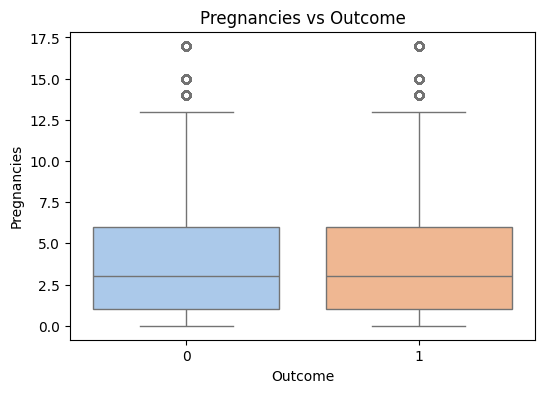

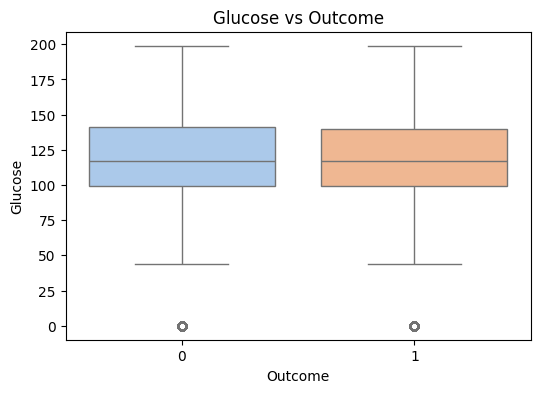

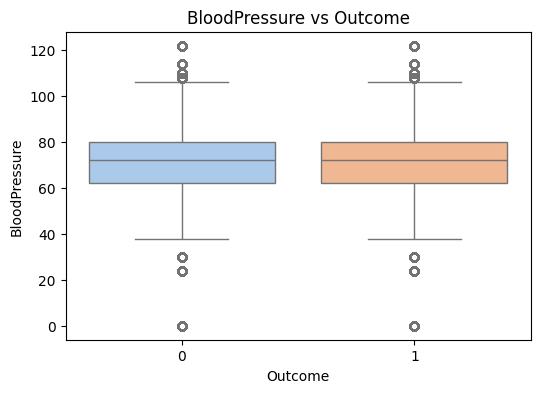

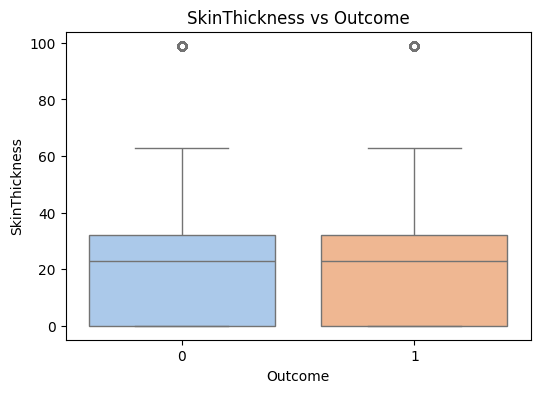

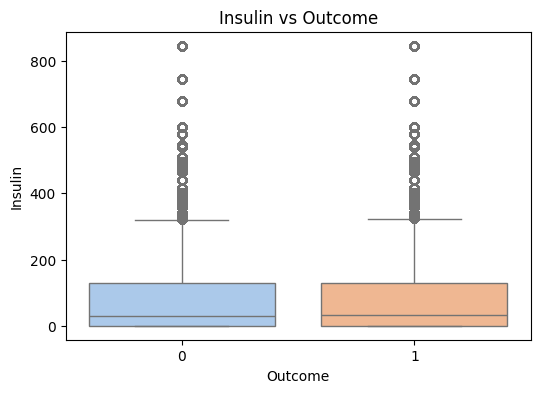

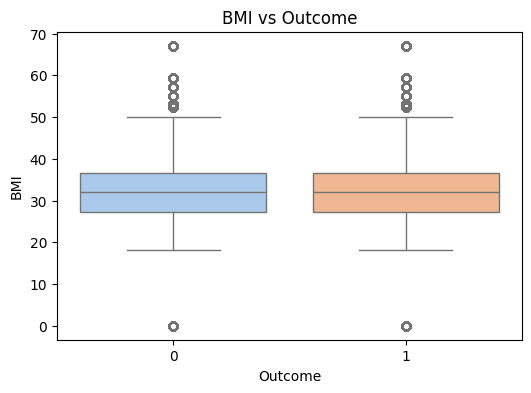

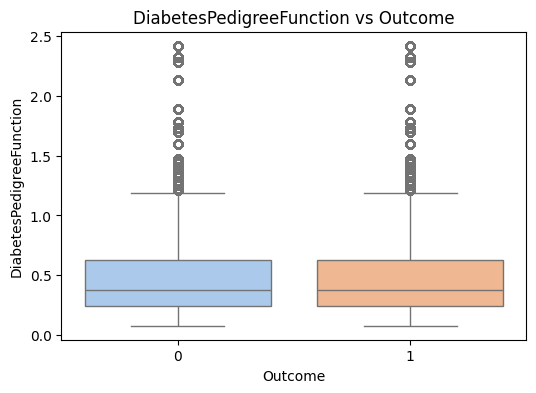

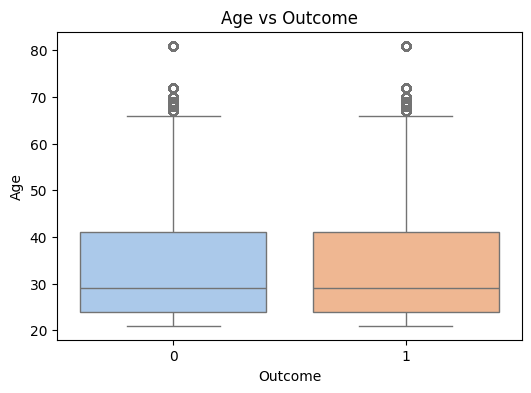

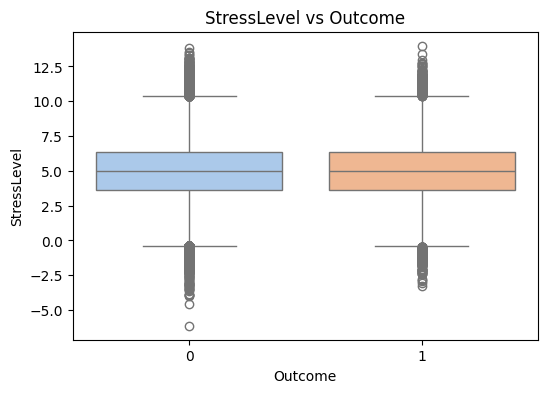

In [18]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Outcome", y=col, hue="Outcome", data=df, palette="pastel", dodge=False, legend=False)
    plt.title(f"{col} vs Outcome")
    plt.show()


Análisis conjunto de variables vs Outcome:

* Qué muestra:
Se analizaron las variables clínicas y de estilo de vida del dataset de diabetes, comparadas contra la variable objetivo Outcome, utilizando boxplots.

* Hallazgo principal:
Las variables Glucose, BMI y Age muestran mayor separación entre grupos, indicando fuerte asociación con el Outcome. Por lo tanto las variables BloodPressure, SkinThickness y StressLevel presentan poca diferencia entre clases.

* Interpretación:
La glucosa es la que mejor distingue entre personas con y sin diabetes. El IMC y la edad también influyen como factores de riesgo, mientras que otras variables como Insulin, DPF, BloodPressure o SkinThickness aportan menos información por sí solas.

* Implicación:
El modelo predictivo deberia priorizar Glucose, BMI y Age como features principales. Variables menos relevantes pueden ser útiles, pero su efecto aislado es limitado. Podría ser necesario aplicar balanceo de clases y ajustar umbrales de decisión para optimizar sensibilidad en la detección de casos positivos.

* Limitaciones: 
El análisis de una variable por separado no muestra cómo se relacionan entre ellas. Además, los valores atípicos y la gran variación en variables como Insulin o DPF pueden afectar los resultados. Por eso es necesario usar validación cruzada para evitar sobreajuste y asegurar que el modelo funcione bien en distintos casos.

### Correlacion entre variables.

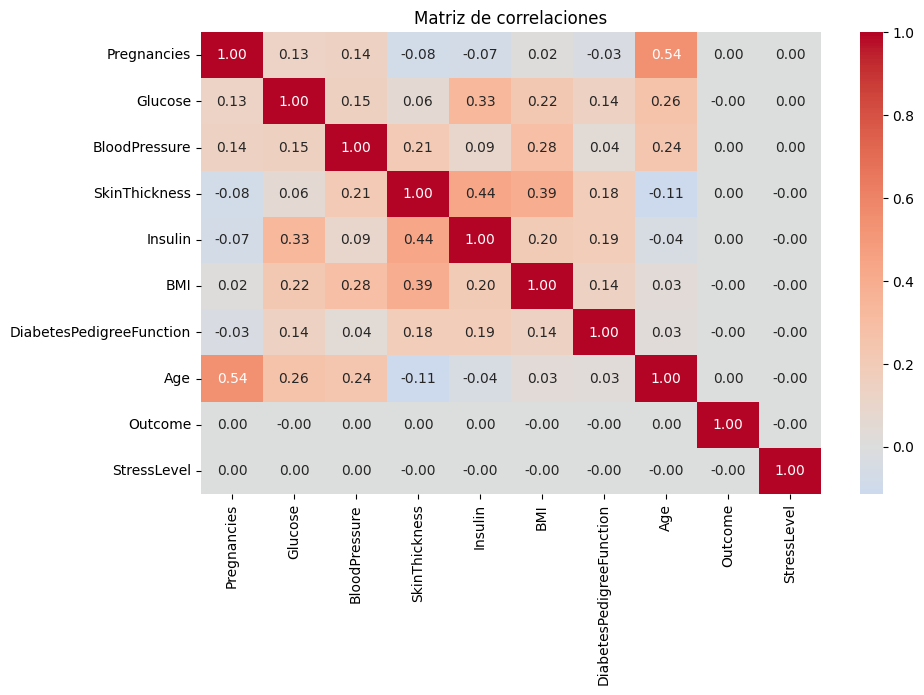

In [21]:
corr = df.select_dtypes(include=['int64', 'float64']).corr()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de correlaciones")
plt.show()

* Que muestra:
Matriz de correlaciones entre variables numéricas y Outcome.

* Hallazgos principales:
Glucose (0.26), BMI (0.26) y Age (0.24) son las más asociadas a Outcome. Otras variables muestran correlaciones muy bajas.

* Interpretación:
La glucosa, el IMC y la edad reflejan su rol clínico como factores de riesgo, mientras que Insulin, BloodPressure y SkinThickness aportan poca relación aislada.

* Implicacion:
Glucose, BMI y Age son predictores clave; el resto puede ganar relevancia en combinación o modelos no lineales.

* Limitaciones:
Las correlaciones son bajas y solo lineales, por lo que no captan interacciones complejas.

### Cruce de variables categoricas


🔹 Variable: Lifestyle
Outcome        0      1
Lifestyle              
Active     79.92  20.08
Sedentary  80.04  19.96


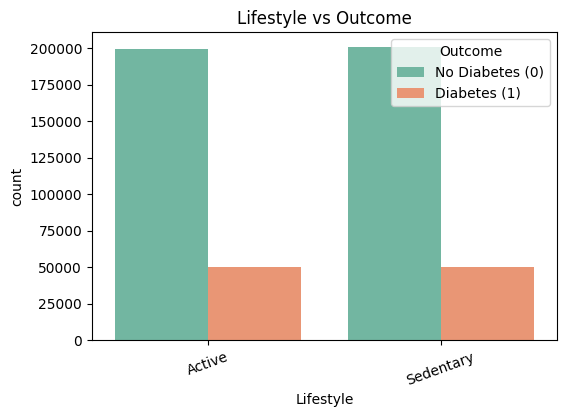


🔹 Variable: DietType
Outcome       0      1
DietType              
Balanced  79.93  20.07
HighCarb  79.97  20.03
LowCarb   80.04  19.96


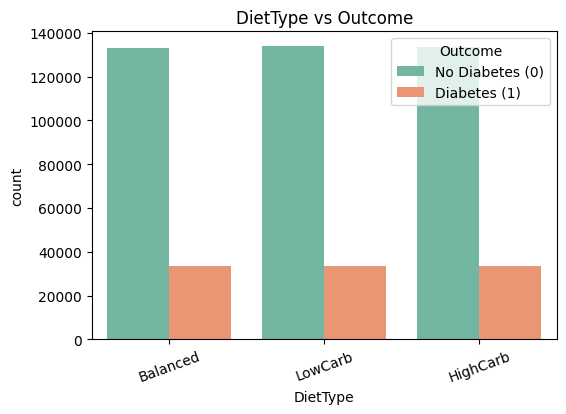


🔹 Variable: SmokingStatus
Outcome            0      1
SmokingStatus              
Non-Smoker     80.06  19.94
Smoker         79.89  20.11


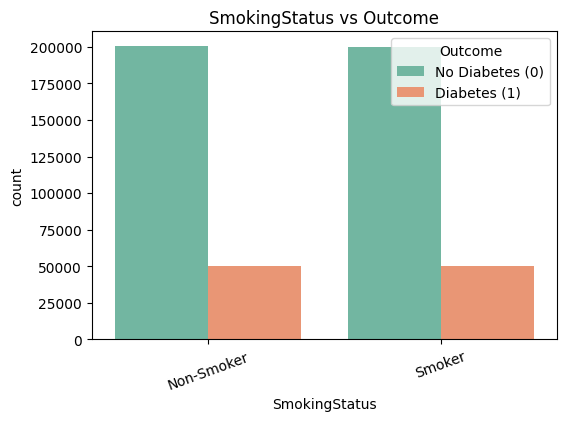


🔹 Variable: FamilyHistory
Outcome            0      1
FamilyHistory              
No             80.03  19.97
Yes            79.92  20.08


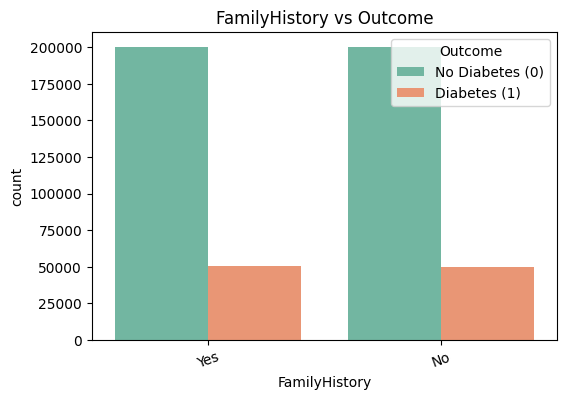

In [24]:
cat_cols = ["Lifestyle", "DietType", "SmokingStatus", "FamilyHistory"]

for col in cat_cols:
    print(f"\n🔹 Variable: {col}")
    
    # Tabla de contingencia normalizada (% por categoría)
    table = pd.crosstab(df[col], df["Outcome"], normalize="index") * 100
    print(table.round(2))
    
    # Gráfico
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue="Outcome", palette="Set2")
    plt.title(f"{col} vs Outcome")
    plt.legend(title="Outcome", labels=["No Diabetes (0)", "Diabetes (1)"])
    plt.xticks(rotation=20)
    plt.show()


LifeStyle VS Outcome:

* Qué muestra: Relación entre estilo de vida (activo o sedentario) y diabetes.
* Hallazgos principales: La proporción de diabetes es mayor en el grupo sedentario que en el activo, pero la diferencia es pequeña.
* Interpretación: El sedentarismo podría asociarse con un ligero aumento del riesgo.
* Implicación: Lifestyle podría ser útil combinado con otras variables.
* Limitaciones: Posible sesgo, diferencias entre grupos son reducidas. 


DietType vs Outcome:

* Qué muestra: Relación entre tipo de dieta (balanceada, baja en carbohidratos, alta en carbohidratos) y diabetes.
* Hallazgos principales: Proporciones de diabetes muy similares en todos los tipos de dieta (20%).
* Interpretación: La dieta no muestra un patrón claro de asociación con el diagnóstico.
* Implicación: DietType no parece un predictor fuerte de Outcome por sí solo.
* Limitaciones: Dieta autoinformada por lo tanto presenta riesgo de sesgo y falta de detalle nutricional.

SmokingStatus vs Outcome:

* Qué muestra: Relación entre hábito de fumar (fumador o no fumador) y diabetes.
* Hallazgos principales: Los fumadores tienen una proporción ligeramente mayor de diabetes frente a no fumadores.
* Interpretación: El tabaquismo puede tener un efecto indirecto sobre riesgo metabólico, pero no se observa una diferencia muy marcada.
* Implicación: SmokingStatus puede aportar información complementaria en los modelos.
* Limitaciones: Posible subregistro del consumo.

FamilyHistory vs Outcome:

* Qué muestra: Relación entre historial familiar de diabetes (sí o no) y diagnóstico.
* Hallazgos principales: Los que reportan historial familiar presentan mayor proporción de diabetes (20.9%) frente a quienes no (19.9%).
* Interpretación: El antecedente familiar sí aparece como un factor de riesgo, aunque el efecto observado no es muy fuerte.
* Implicación: FamilyHistory puede mejorar la predicción al reflejar predisposición genética.
* Limitaciones: Posible falta de precisión en la información familiar, además de variabilidad por desconocimiento.